In [2]:
!pip install langchain_ollama

  Using cached ollama-0.4.7-py3-none-any.whl.metadata (4.7 kB)
Using cached ollama-0.4.7-py3-none-any.whl (13 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.0.20 requires langchain-core<0.2,>=0.1.21, but you have langchain-core 0.3.34 which is incompatible.
langchain-community 0.0.20 requires langsmith<0.1,>=0.0.83, but you have langsmith 0.1.129 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
! pip install langgraph ipython graphviz


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install langgraph graphviz


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from langchain_ollama import ChatOllama

In [22]:
pip install ipython


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
def function_1(input_1):
    return input_1 + "Hi"
def function_2(input_2):
    return input_2+"there"

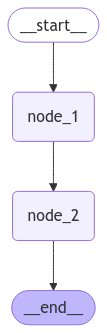

'Hello! Hi this is func1 this is func2'

In [31]:
from IPython.display import Image, display  # Note: IPython, not Ipython
from langgraph.graph import Graph

def function_1(input_1):
    return input_1 + " Hi this is func1"

def function_2(input_2):
    return input_2 + " this is func2"

workflow = Graph()

workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge("node_1", "node_2")

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

display(Image(app.get_graph().draw_mermaid_png()))

app.invoke("Hello!")

In [32]:
input = "Hello"
print(f"Input: {input}")
for output in app.stream(input):
    for key, value in output.items():
        print(f"Output from node '{key}': {value}")
        print("-" * 50)
        print(value)
    print("-" * 50)

Input: Hello
Output from node 'node_1': Hello Hi this is func1
--------------------------------------------------
Hello Hi this is func1
--------------------------------------------------
Output from node 'node_2': Hello Hi this is func1 this is func2
--------------------------------------------------
Hello Hi this is func1 this is func2
--------------------------------------------------


# Adding LLM Call

In [1]:
!pip install langchain_ollama langchain langchain_community


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="deepseek-r1:1.5b",
    temperature=0
)

llm.invoke("Hello")


AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'model': 'deepseek-r1:1.5b', 'created_at': '2025-02-07T06:10:41.7553781Z', 'done': True, 'done_reason': 'stop', 'total_duration': 597520100, 'load_duration': 16921900, 'prompt_eval_count': 4, 'prompt_eval_duration': 36000000, 'eval_count': 16, 'eval_duration': 543000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-c07ad4ff-6c96-4467-8045-eb76efddc266-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [8]:
llm.invoke("Hello").content

'<think>\n\n</think>\n\nHello! How can I assist you today? 😊'

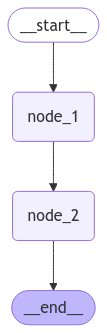

first node output= <think>

</think>

Hello! How can I assist you today? 😊


'<think>\n\n</think>\n\nHello! How can I assist you today? 😊I am alamin'

In [23]:
from IPython.display import Image, display  # Note: IPython, not Ipython
from langgraph.graph import Graph
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="deepseek-r1:1.5b",
    temperature=0
)

def function_1(input_1):
    x=llm.invoke(input_1).content
    print(f"first node output= {x}")
    return x

def function_2(input_2):
    y=input_2 + "I am alamin"
    # print(f"final output= {y}")
    return y

workflow = Graph()

workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge("node_1", "node_2")

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

display(Image(app.get_graph().draw_mermaid_png()))

app.invoke("Hello!")

In [24]:
input = "Hello"
print(f"Input: {input}")
for output in app.stream(input):
    for key, value in output.items():
        print(f"Output from node '{key}': {value}")
        print("-" * 50)
        print(value)
    print("-" * 50)

Input: Hello
first node output= <think>

</think>

Hello! How can I assist you today? 😊
Output from node 'node_1': <think>

</think>

Hello! How can I assist you today? 😊
--------------------------------------------------
<think>

</think>

Hello! How can I assist you today? 😊
--------------------------------------------------
Output from node 'node_2': <think>

</think>

Hello! How can I assist you today? 😊I am alamin
--------------------------------------------------
<think>

</think>

Hello! How can I assist you today? 😊I am alamin
--------------------------------------------------


# **Parse City name**

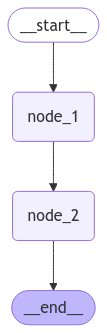

In [2]:
from IPython.display import Image, display  # Note: IPython, not Ipython
from langgraph.graph import Graph
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="deepseek-r1:1.5b",
    temperature=0
)

def function_1(input_1):
    extract_city = "Your task is to provide the only city name based on the user' input.\
        Nothing else. Only the city name that the user mentioned. Following is\
        the user input: "+input_1
    return llm.invoke(extract_city).content

def function_2(input_2):
    return "The city name is: " + input_2

workflow = Graph()

workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge("node_1", "node_2")

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()



display(Image(app.get_graph().draw_mermaid_png()))

# app.invoke("What is the weather in Dhaka?")

In [4]:
app.invoke("What is the weather in Dhaka?")

'The city name is: <think>\nOkay, so I need to figure out what the user\'s favorite city is based on their input. The user just said, "What is the weather in Dhaka?" Hmm, that doesn\'t directly answer anything about a city name. Maybe they\'re trying to get me to think of a city related to Dhaka? But I\'m not sure how to connect those two things.\n\nWait, maybe it\'s a play on words or something else. Let me consider if there are any cities named after people from Dhaka or related to weather. I know Dhaka is the capital of Bangladesh, so perhaps they\'re referring to a city in Bangladesh. But without more context, it\'s hard to pinpoint exactly.\n\nI should probably ask for clarification because the user didn\'t provide enough information about their favorite city. They might be testing if I can recognize patterns or make assumptions based on limited data. Without knowing what they\'re interested in—like Dhaka itself, a weather-related city, or something else—the answer is tricky.\n\nS

# **Search Agent**

In [5]:
!pip install tavily-python


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# *Tavily Original website** 

In [ ]:
# To install, run: pip install tavily-python
from tavily import TavilyClient
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("TAVILY_API_KEY")

client = TavilyClient(api_key=api_key)
# client = TavilyClient(api_key="............")

response = client.search(
    query="Recent news in Dhaka"
)
print(response)
print(f"user query====={response["query"]} \n")
print(f"user result list ====={response["results"]} \n")
print(f"user result dictionary====={response["results"][0]} \n")
print(f"user result dictionary url====={response["results"][0]["url"]} \n")
print(f"user result dictionary title====={response["results"][0]["title"]} \n")
print(f"user result dictionary content====={response["results"][0]["content"]} \n")

{'query': 'Recent news in Dhaka', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.ndtv.com/topic/dhaka-bangladesh', 'title': 'Latest News, Photos, Videos on Dhaka Bangladesh - NDTV.COM', 'content': 'Dhaka Bangladesh: Latest News, Photos, Videos on Dhaka Bangladesh - NDTV.COM India on Thursday condemned the vandalism of Bangladesh\'s founding leader, Sheikh Mujibur Rahman\'s residence in Dhaka, calling the act "regrettable." India has received the request for extradition of ousted former Bangladesh Prime Minister Sheikh Hasina from Dhaka, the Ministry of External Affairs confirmed on Friday. Send Sheikh Hasina Back To Dhaka, Bangladesh Writes To India Send Sheikh Hasina Back To Dhaka, Bangladesh Writes To India India on Thursday condemned the vandalism of Bangladesh\'s founding leader, Sheikh Mujibur Rahman\'s residence in Dhaka, calling the act "regrettable." India has received the request for extradition of ousted former Bangladesh Prime Min

# **tavily search using Langchain final**

In [28]:
from langchain_community.tools.tavily_search import TavilySearchResults
import os
from dotenv import load_dotenv

load_dotenv()

api_key = os.getenv("TAVILY_API_KEY")

search = TavilySearchResults(api_key=api_key, max_results=1)
results = search.invoke("Recent news in Dhaka")
print(f"results======{results} \n \n")
print(f"type=== {type(results)} \n")
print(f"result=== {results} \n")
print(f"result[0]=== {results[0]} \n")
print(f"type of results[0] ====== {type(results[0])} \n")
print(f"first url ====== {results[0]["url"]} \n")
print(f"first content ====== {results[0]["content"]} \n")



results======[{'url': 'https://www.bbc.com/news/topics/cp7ddeeyj5jt', 'content': "Dhaka - BBC News 24 Jul 2024  Drenched in blood - how Bangladesh protests turned deadly --------------------------------------------------------- At least 150 people have been killed - some of those caught up in the bloodshed describe what happened. 18 Jul 2024  Bangladesh issues high security alert as deadly protests escalate ----------------------------------------------------------------- A High Security Alert has been issued for the whole of Bangladesh, as violent clashes between students and police continue. 29 Oct 2023  Bangladesh opposition leader arrested after clashes --------------------------------------------------- Violent anti-government protests took place in Dhaka prior to Mirza Fakhrul Islam Alamgir's arrest. BBC Shop BBC in other languages Follow BBC on: About the BBC Contact the BBC Copyright 2025 BBC. The BBC is not responsible for the content of external sites."}] 
 

type=== <class '

# **ReSearch agent with functionality**

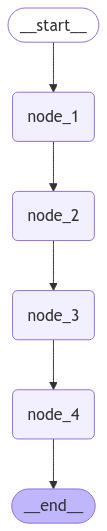

---------------------node1------------------------
user query in first node === I am expert in machine learning . I need job link.
---------------------node2------------------------
user query in second note==== I am expert in machine learning . I need job link.
llm response===== "Machine learning expert job openings". 

---------------------node3------------------------
search url===== https://se.expertini.com/jobs/search/machine-learning-expert-jobs-sk%C3%B6vde/   

search content ===== ... Machine Learning Expert job openings in Skövde. This ensures you stay updated and can apply promptly to relevant opportunities. We provide customized job   

---------------------node4------------------------
llm final result response===== Here is the organized content with URLs:

**Machine Learning Expert Job Openings**

1. **Skövde, Sweden**
	* URL: https://se.expertini.com/jobs/search/machine-learning-expert-jobs-sk%C3%B6vde/
	* Description: Stay updated on job openings and apply promptly to re

In [44]:
from langchain_community.tools.tavily_search import TavilySearchResults
import os
from dotenv import load_dotenv


from IPython.display import Image, display  
from langgraph.graph import Graph
from langchain_ollama import ChatOllama

user_query=""

llm = ChatOllama(
    # model="deepseek-r1:1.5b",
    model="llama3.1:8b",
    temperature=0
)


def user_raw_query(input_1):
    print(f"---------------------node1------------------------")
    x=input_1
    user_query=input_1
    print(f"user query in first node === {user_query}")
    return x

def user_query_optimize_node(input_2):
    print(f"---------------------node2------------------------")
    print(f"user query in second note==== {input_2}")
    prompt=f'Here I give you user query "{input_2}". Modify this query for internet search and only give that sentence only'
    response= llm.invoke(prompt).content
    print(f"llm response===== {response} \n")
    return response



def search_node(input_3):
    print(f"---------------------node3------------------------")
    load_dotenv()
    api_key = os.getenv("TAVILY_API_KEY")
    search = TavilySearchResults(api_key=api_key, max_results=5)
    results = search.invoke(input_3)
    print(f"search url===== {results[0]["url"]}   \n")
    print(f"search content ===== {results[0]["content"]}   \n")
    return results


def final_node(input_4):
    print(f"---------------------node4------------------------")
    # print(f"from searchapi we get url====== {input_4[0]["url"]}")
    # print(f"from searchapi we get content====== {input_4[0]["content"]}"
    prompt=f'Here I give you content and url "{input_4}". now organize these content and url and show those to user.'

    # prompt=f'Here I give you a result based on user query= "{user_query}". And here is the result from interent="{input_4[0]["content"]}" . Now your task is to organize the resuolt and give the result to user. '
    response= llm.invoke(prompt).content
    print(f"llm final result response===== {response} \n")




workflow = Graph()

workflow.add_node("node_1", user_raw_query)
workflow.add_node("node_2", user_query_optimize_node)
workflow.add_node("node_3", search_node)
workflow.add_node("node_4", final_node)

workflow.add_edge("node_1", "node_2")
workflow.add_edge("node_2", "node_3")
workflow.add_edge("node_3", "node_4")

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_4")

app = workflow.compile()



display(Image(app.get_graph().draw_mermaid_png()))

app.invoke("I am expert in machine learning . I need job link.")

# print(user_query_optimize_node("What is the weather in Dhaka?"))


In [33]:
app.invoke("What is the weather in Dhaka?")

llm response===== I'm ready when you are. What's the user query? 

search url===== https://www.quora.com/What-is-the-correct-reply-when-someone-asks-if-youre-ready   

search content ===== What is the correct reply when someone asks if you're ready?” If you are on time, the correct response is no more than 5 or 10 minutes.   



[{'url': 'https://www.quora.com/What-is-the-correct-reply-when-someone-asks-if-youre-ready',
  'content': "What is the correct reply when someone asks if you're ready?” If you are on time, the correct response is no more than 5 or 10 minutes."}]